# EPO4 Assignment: ECG Preprocessing and Feature Extraction 

## Dataset: WESAD

please note that below are some simple techniques to get you started with processing ECG signals. After completening this assighnment you are free to choose you own approach and algorithms for the project.

## Dowload and read the data

To download the data go to [here](https://ubicomp.eti.uni-siegen.de/home/datasets/icmi18/), click on link in the download section. More information on dataset can be found[here](https://archive.ics.uci.edu/ml/datasets/WESAD+%28Wearable+Stress+and+Affect+Detection%29). If you are working in colab, an easy way to have access to the dataset is to upload it to you google drive. Go to [My Drive](https://drive.google.com/drive/my-drive) and use "new > folder upload" and upload the unzipped folder. Once the folder is uploaded you can read its files from colab. You only need to mount google drive on colab notebook every time you open your notebook. To do so,  go to "Files" on the vertical tab menu on right and click on "Mount Drive".

In [82]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
import os
import pickle
import numpy as np
from scipy import signal
from scipy.signal import butter, iirnotch, lfilter
import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join, isdir
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.ndimage

In [84]:
'''from google.colab import drive
drive.mount('/content/drive', force_remount=True)'''

"from google.colab import drive\ndrive.mount('/content/drive', force_remount=True)"

We need to define the dataset path and the subject ID

In [85]:
#S2 is Test data set, the other 14 will be used as training
data_set_path = "D:\Downloads\WESAD\WESAD\\"
subject = ["S2",'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S13', 'S14', 'S15', 'S16', 'S17']

The class below allows you to access all the recordings and labels in the dataset.

In [86]:
class read_data_of_one_subject:
    """Read data from WESAD dataset"""
    def __init__(self, path, subject):
        self.keys = ['label', 'subject', 'signal']
        self.signal_keys = ['wrist', 'chest']
        self.chest_sensor_keys = ['ACC', 'ECG', 'EDA', 'EMG', 'Resp', 'Temp']
        self.wrist_sensor_keys = ['ACC', 'BVP', 'EDA', 'TEMP']
        #os.chdir(path)
        #os.chdir(subject)
        with open(path + subject +'/'+subject + '.pkl', 'rb') as file:
            data = pickle.load(file, encoding='latin1')
        self.data = data

    def get_labels(self):
        return self.data[self.keys[0]]

    def get_wrist_data(self):
        """"""
        #label = self.data[self.keys[0]]
        assert subject == self.data[self.keys[1]]
        signal = self.data[self.keys[2]]
        wrist_data = signal[self.signal_keys[0]]
        #wrist_ACC = wrist_data[self.wrist_sensor_keys[0]]
        #wrist_ECG = wrist_data[self.wrist_sensor_keys[1]]
        return wrist_data

    def get_chest_data(self):
        """"""
        signal = self.data[self.keys[2]]
        chest_data = signal[self.signal_keys[1]]
        return chest_data

In [87]:
# Object instantiation
obj_data_train = {}
obj_data_test = {}
 
# Accessing class attributes and method through objects 
#Test set
obj_data_test[subject[0]] = read_data_of_one_subject(data_set_path, subject[0])

#Train set
for i in range(1,len(subject)):
    
    obj_data_train[subject[i]] = read_data_of_one_subject(data_set_path, subject[i])
    print(obj_data_train[subject[i]].data)

KeyboardInterrupt: 

The code below allows you to read and print the length of all biosignals from the chest recording device recorded all at 700 Hz.

In [ ]:
#######################
#Chest data set for TESTING
chest_data_dict_test = obj_data_test[subject[0]].get_chest_data()
print(type(chest_data_dict_test))

chest_dict_length_test = {key: len(value) for key, value in chest_data_dict_test.items()}
print(chest_dict_length_test)

print(chest_data_dict_test)

<class 'dict'>
{'ACC': 4255300, 'ECG': 4255300, 'EMG': 4255300, 'EDA': 4255300, 'Temp': 4255300, 'Resp': 4255300}
{'ACC': array([[ 0.95539999, -0.222     , -0.55799997],
       [ 0.92579997, -0.2216    , -0.55379999],
       [ 0.90820003, -0.21960002, -0.53920001],
       ...,
       [ 0.87179995, -0.12379998, -0.30419999],
       [ 0.87300003, -0.12339997, -0.30260003],
       [ 0.87020004, -0.12199998, -0.30220002]]), 'ECG': array([[ 0.02142334],
       [ 0.02032471],
       [ 0.01652527],
       ...,
       [-0.00544739],
       [ 0.00013733],
       [ 0.0040741 ]]), 'EMG': array([[-0.00444031],
       [ 0.00434875],
       [ 0.00517273],
       ...,
       [-0.01716614],
       [-0.02897644],
       [-0.02357483]]), 'EDA': array([[5.25054932],
       [5.26733398],
       [5.24330139],
       ...,
       [0.36048889],
       [0.36582947],
       [0.365448  ]]), 'Temp': array([[30.120758],
       [30.129517],
       [30.138214],
       ...,
       [31.459229],
       [31.484283],
   

In [ ]:
#######################
#Chest data set for TRAINING
for i in range(1,len(subject)):
    chest_data_dict_train = obj_data_train[subject[i]].get_chest_data()
    print(type(chest_data_dict_train))

    chest_dict_length_train = {key: len(value) for key, value in chest_data_dict_train.items()}
    print(chest_dict_length_train)

<class 'dict'>
{'ACC': 4545100, 'ECG': 4545100, 'EMG': 4545100, 'EDA': 4545100, 'Temp': 4545100, 'Resp': 4545100}
<class 'dict'>
{'ACC': 4496100, 'ECG': 4496100, 'EMG': 4496100, 'EDA': 4496100, 'Temp': 4496100, 'Resp': 4496100}
<class 'dict'>
{'ACC': 4380600, 'ECG': 4380600, 'EMG': 4380600, 'EDA': 4380600, 'Temp': 4380600, 'Resp': 4380600}
<class 'dict'>
{'ACC': 4949700, 'ECG': 4949700, 'EMG': 4949700, 'EDA': 4949700, 'Temp': 4949700, 'Resp': 4949700}
<class 'dict'>
{'ACC': 3666600, 'ECG': 3666600, 'EMG': 3666600, 'EDA': 3666600, 'Temp': 3666600, 'Resp': 3666600}
<class 'dict'>
{'ACC': 3826200, 'ECG': 3826200, 'EMG': 3826200, 'EDA': 3826200, 'Temp': 3826200, 'Resp': 3826200}
<class 'dict'>
{'ACC': 3656100, 'ECG': 3656100, 'EMG': 3656100, 'EDA': 3656100, 'Temp': 3656100, 'Resp': 3656100}
<class 'dict'>
{'ACC': 3847200, 'ECG': 3847200, 'EMG': 3847200, 'EDA': 3847200, 'Temp': 3847200, 'Resp': 3847200}
<class 'dict'>
{'ACC': 3663100, 'ECG': 3663100, 'EMG': 3663100, 'EDA': 3663100, 'Temp': 

You can also access the labels of each class. The following labels are provided: 0 = not defined / transient, 1 = baseline, 2 = stress, 3 = amusement, 4 = meditation, 5/6/7 = should be ignored in this dataset.

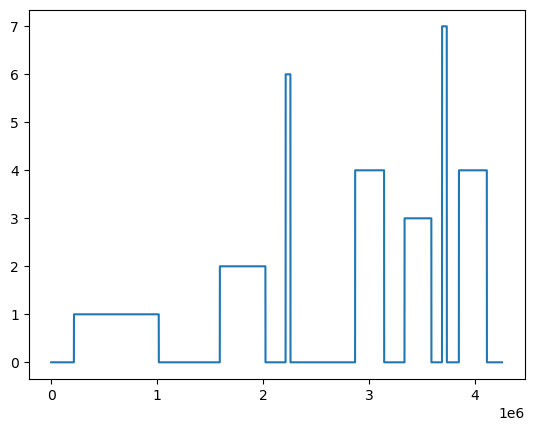

In [ ]:
# Get labels
labels = obj_data_test[subject[0]].get_labels() 
baseline = np.asarray([idx for idx,val in enumerate(labels) if val == 1])
stress = np.asarray([idx for idx,val in enumerate(labels) if val == 2])
plt.plot(labels)

In [ ]:
def time_freq_plot(x, Fs, segment):
  
  # Reshape the signal into segments to creat matrix X, size (79, 163) of you drop samples
  num_segments = int(np.ceil(len(x)/(Fs*segment)))
  len_segments = int(np.floor(len(x)/num_segments))

  overshoot = len(x) - num_segments*len_segments
  
  if(overshoot != 0):
      x = x[0:-overshoot]
  X = np.reshape(x,(num_segments,len_segments))

In [ ]:
print(baseline, '\n')
print(stress)
print(np.shape(stress))
print(np.shape(baseline))

time=(np.max(baseline)-np.min(baseline))
print(time)

[ 214583  214584  214585 ... 1015380 1015381 1015382] 

[1591482 1591483 1591484 ... 2021979 2021980 2021981]
(430500,)
(800800,)
800799


Let's load some part of the ECG signal during baseline recording

Text(0, 0.5, '$ECG$')

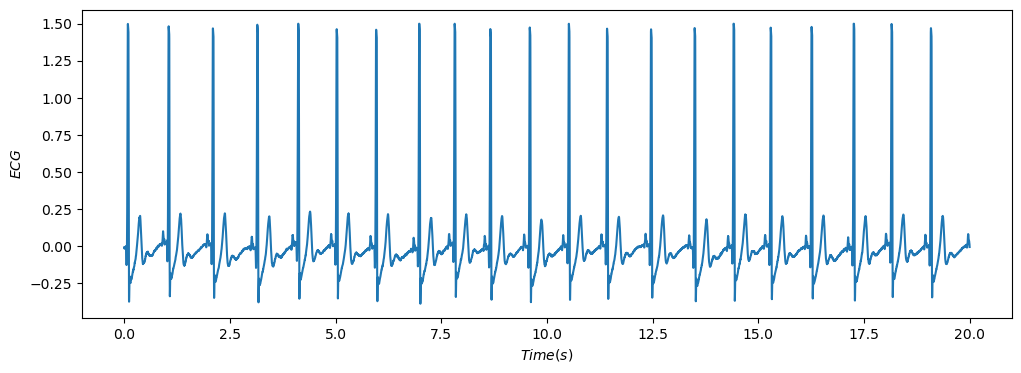

In [ ]:
ecg_base=chest_data_dict_train['ECG'][baseline,0]
fs=700
# cut a smaller window
ecg=ecg_base[1000:1000+2* 10*fs]

t=np.arange(0,ecg.size*(1/fs),(1/fs))
t=t[:ecg.size]

plt.figure(figsize=(12,4))
plt.plot(t,ecg)
plt.xlabel('$Time (s)$') 
plt.ylabel('$ECG$') 

## Filtering 
Below you can see how we can perform highpass, low pass and noth filtering on ECG recordings.

For the highpass and lowpass filter we use a 5th order digital butterworth with a normalized frequency, and output set to `output='ba'`. For the nuch filter we use the second-order IIR notch digital filter with `Q=30`.

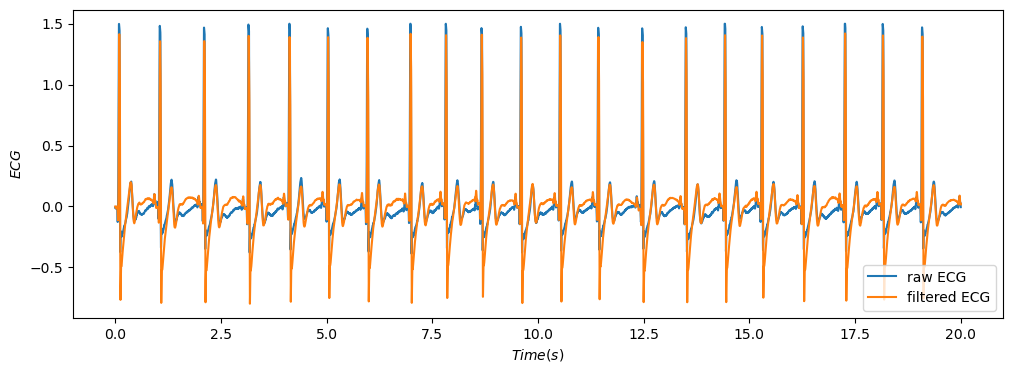

In [ ]:
nyq = 0.5*fs
order=5

# highpass filter
high=0.5
high= high/nyq
b, a = butter(order, high, btype= 'highpass')
ecg_h = lfilter(b,a,ecg)

# lowpass filter
low=70
low= low/nyq
b, a = butter(order, low)
ecg_hl = lfilter(b,a,ecg_h)

# notch filter
notch=50
notch = notch/nyq
b, a = iirnotch(notch, 30, fs=fs)
ecg_hln = lfilter(b,a,ecg_hl)


plt.figure(figsize=(12,4))
plt.plot(t,ecg,label="raw ECG")
plt.plot(t,ecg_hln, label="filtered ECG")
plt.xlabel('$Time (s)$') 
plt.ylabel('$ECG$') 
plt.legend()

## R peak Detection
You can either develope your own code for r-peak detection or use the pan-tompkin approach for that. Pan-tompkins does some filtering on the data itself so you can just pass the raw data to it.

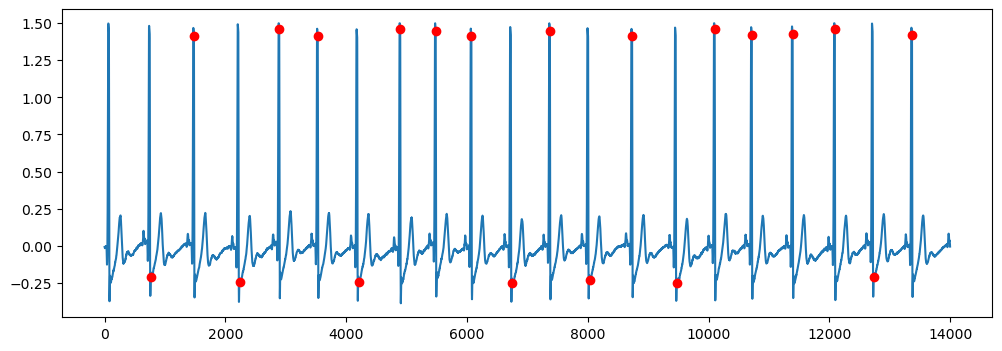

In [ ]:
# detect R-peaks
from ecgdetectors import Detectors
detectors = Detectors(fs)

r_peaks_pan = detectors.pan_tompkins_detector(ecg_hln)
r_peaks_pan = np.asarray(r_peaks_pan)

plt.figure(figsize=(12,4))
plt.plot(ecg)
plt.plot(r_peaks_pan,ecg[r_peaks_pan], 'ro')

In [ ]:
eda_stress=chest_data_dict_test['EDA'][stress,0]
eda_base=chest_data_dict_test['EDA'][baseline,0]
fs=700
# cut a smaller window
print(len(stress))
t_tot=(len(stress)//(int(0.5*60*fs)))
print(t_tot)
eda_stress_tot=np.empty([21000,20])
eda_base_tot=np.empty([21000,20])
for i in range(t_tot): 
    eda1=eda_stress[i*int(0.5*60*700):(i+1)*int(0.5*60*700)]
    eda2=eda_base[i*int(0.5*60*700):(i+1)*int(0.5*60*700)]
    t1=np.arange(0,eda1.size*(1/fs),(1/fs))
    t1=t1[:eda1.size]
    t2=np.arange(0,eda2.size*(1/fs),(1/fs))
    t2=t2[:eda2.size]
    eda_stress_tot[:,i] = eda1
    eda_base_tot[:,i]=eda2
''' plt.figure(figsize=(12,4))
    plt.plot(t1,eda1, label= 'Stress')
    plt.plot(t2, eda2, label= 'Base')
    plt.legend()
    plt.xlabel('$Time (s)$') 
    plt.ylabel('$EDA$')'''
    
print(eda1.shape)
print(eda_stress_tot.shape)
#print(eda_stress_tot) 

print(eda2.shape)
print(eda_stress_tot.shape)
#print(eda_stress_tot) 

430500
20
(21000,)
(21000, 20)
(21000,)
(21000, 20)


In [ ]:
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, 'D:\Documents\GitHub\EPO-4_BioBombs\Machine learning')
# eda recordings D:\Downloads\WESAD\WESAD\\
#eda = chest_data_dict_test['EDA']
from EDA import EDAprep
eda_comp=np.zeros((3,11000,20))
EDA = []
for i in range (t_tot): 
    EDA = EDAprep(fs, eda_stress_tot[:,i],20,"baseline")

    #EDA.plotdata()
    eda_lp = EDA.filtering_data()
    eda_sm = EDA.smoothing_data(eda_lp)
    eda_comp[:,:,i]=EDA.decompose_data(eda_sm)

In [ ]:
print(eda_comp.shape)
#print(eda_comp)
for i in range(t_tot):
    smooth_eda=eda_comp[0]
    phasic=eda_comp[1]
    tonic=eda_comp[2]

t=np.arange(0,phasic.size*(1/fs),(1/fs))
t=t[:phasic.shape[0]]
print(t.shape)
print(phasic.shape)

(3, 11000, 20)
(11000,)
(11000, 20)


In [ ]:
# plot
'''plt.figure(figsize=(12,4))
plt.xlim([0,30])
plt.plot(t,phasic[:,17],label='phasic')
plt.plot(t[peaks],phasic[:,17][peaks],'o',label='peaks')

# labels and titles
plt.xlabel('$Time (s)$') 
plt.ylabel('$EDA$') 
plt.legend()'''

"plt.figure(figsize=(12,4))\nplt.xlim([0,30])\nplt.plot(t,phasic[:,17],label='phasic')\nplt.plot(t[peaks],phasic[:,17][peaks],'o',label='peaks')\n\n# labels and titles\nplt.xlabel('$Time (s)$') \nplt.ylabel('$EDA$') \nplt.legend()"

[3.75714286e-01 1.58142857e+00 6.40000000e+00 2.85714286e-03
 1.70000000e+00 1.25285714e+00 1.02857143e+00 3.84285714e-01
 1.24142857e+00 1.92142857e+00 6.08571429e-01 1.76428571e+00
 6.72857143e-01 2.14285714e-01 1.51000000e+00 4.72857143e-01
 1.85142857e+00 4.98714286e+00 3.02857143e-01 2.68571429e-01
 1.04857143e+00 2.75714286e-01 6.02571429e+00 4.05714286e-01
 5.78571429e-01 9.42857143e-01 2.58571429e-01 1.38142857e+00
 2.85714286e-03 5.17142857e-01 4.03857143e+00 6.02857143e-01
 2.67142857e-01 9.81428571e-01 2.57285714e+00 4.00000000e-01
 2.50428571e+00 4.40428571e+00 3.41428571e-01 6.15714286e-01
 1.85000000e+00 9.78571429e-01 3.13285714e+00 2.85714286e-03
 2.85714286e-03 2.49857143e+00 4.71428571e-01 3.47000000e+00
 1.80857143e+00 5.82857143e-01 4.40857143e+00 2.18428571e+00
 7.11428571e-01 1.11714286e+00 2.14857143e+00 1.50142857e+00
 5.57571429e+00 2.53000000e+00 5.37142857e-01 1.88714286e+00
 1.04142857e+00 1.37142857e+00 2.04428571e+00 8.48571429e-01
 2.31000000e+00 2.538571

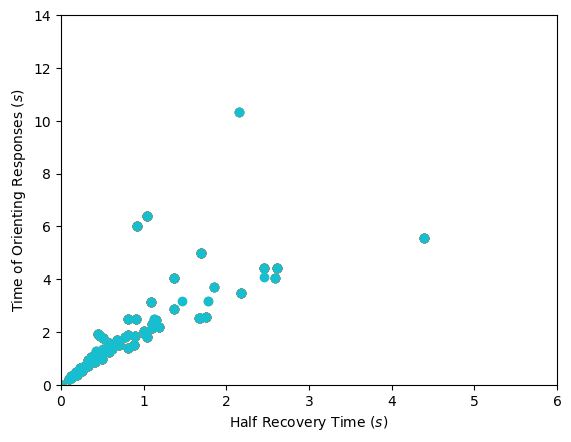

In [ ]:
import numpy as np
from scipy.signal import chirp, find_peaks, peak_widths, peak_prominences
#peaks_2d=np.empty((9,t_tot))
#heights_2d=np.empty((5,t_tot))
#widths_2d=np.empty((5,t_tot))

def calc_phasic_data(phasic, peak, height):
    ##Find all the points on the plot below the 50% of the peak
    half_points = np.where(((phasic - (phasic[peak] - 0.5*height) < 0.00001)))[0]

    ##Finds the index of the point directly to the right of the peak
    half_amp_index = np.inf
    for j in half_points:
      if(j < half_amp_index and j > peak):
        half_amp_index = j

    ##Half amplitude after the peak
    half_amp_val = phasic[half_amp_index]

    ##Calculate onset and offset
    onset_points = np.where(((phasic - (phasic[peak] - 0.63*height) < 0.00001)))[0]

    ##Finds the index of the point directly to the right of the peak
    offset_amp_index = np.inf
    for j in onset_points:
      if(j < offset_amp_index and j > peak):
        offset_amp_index = j

    offset_amp_val = phasic[offset_amp_index]

    ##Finds the index of the point directly to the right of the peak
    onset_amp_index = 0
    for j in onset_points:
      if(j > onset_amp_index and j < peak):
        onset_amp_index = j

    onset_amp_val = phasic[onset_amp_index]

    return onset_amp_index, half_amp_index, offset_amp_index

orienting_mag = np.asarray([], dtype = "float")
orienting_time = np.asarray([], dtype = "float")
half_recov_time = np.asarray([], dtype = "float")

for k in range (t_tot):
    peaks, _ = find_peaks(phasic[:,k])
    heights, _, __ = peak_prominences(phasic[:,k], peaks)
    widths, _, __, ___ = peak_widths(phasic[:,k], peaks, rel_height=0.63)

# find the indices with an amplitude larger that 0.1
    keep = np.full(len(peaks), True)
    amplitude_min=0.1
    keep[peaks < 0.1] = False

    # only keep those
    peaks=peaks[keep]
    heights=heights[keep]
    widths=widths[keep]
    
    peaks=np.hstack(peaks)
    heights=np.hstack(heights)
    widths=np.hstack(widths)

    for i in range(len(peaks)):
      onset_amp_index, half_amp_index, offset_amp_index = calc_phasic_data(phasic[:,k], peaks[i], heights[i])
      
      orienting_mag = np.append(orienting_mag, phasic[:,k][peaks[i]] - phasic[:,k][onset_amp_index])
      orienting_time = np.append(orienting_time, (offset_amp_index - onset_amp_index)/fs)
      half_recov_time = np.append(half_recov_time, (half_amp_index - peaks[i])/fs)

    plt.plot(half_recov_time,orienting_time,'o',label='Peaks')
    plt.xlim([0,6])
    plt.ylim([0,14])
    plt.xlabel('Half Recovery Time $(s)$') 
    plt.ylabel('Time of Orienting Responses $(s)$')
print(orienting_time)
print(orienting_time.shape)

In [ ]:
print(orienting_time)
print(orienting_time.shape)

print(baseline.shape)

[3.75714286e-01 1.58142857e+00 6.40000000e+00 2.85714286e-03
 1.70000000e+00 1.25285714e+00 1.02857143e+00 3.84285714e-01
 1.24142857e+00 1.92142857e+00 6.08571429e-01 1.76428571e+00
 6.72857143e-01 2.14285714e-01 1.51000000e+00 4.72857143e-01
 1.85142857e+00 4.98714286e+00 3.02857143e-01 2.68571429e-01
 1.04857143e+00 2.75714286e-01 6.02571429e+00 4.05714286e-01
 5.78571429e-01 9.42857143e-01 2.58571429e-01 1.38142857e+00
 2.85714286e-03 5.17142857e-01 4.03857143e+00 6.02857143e-01
 2.67142857e-01 9.81428571e-01 2.57285714e+00 4.00000000e-01
 2.50428571e+00 4.40428571e+00 3.41428571e-01 6.15714286e-01
 1.85000000e+00 9.78571429e-01 3.13285714e+00 2.85714286e-03
 2.85714286e-03 2.49857143e+00 4.71428571e-01 3.47000000e+00
 1.80857143e+00 5.82857143e-01 4.40857143e+00 2.18428571e+00
 7.11428571e-01 1.11714286e+00 2.14857143e+00 1.50142857e+00
 5.57571429e+00 2.53000000e+00 5.37142857e-01 1.88714286e+00
 1.04142857e+00 1.37142857e+00 2.04428571e+00 8.48571429e-01
 2.31000000e+00 2.538571

In [ ]:
eda_comp_base=np.zeros((3,11000,20))
EDA_base = []
for i in range (t_tot): 
    EDA = EDAprep(fs, eda_base_tot[:,i],20,"baseline")

    #EDA.plotdata()
    eda_lp_base = EDA.filtering_data()
    eda_sm_base = EDA.smoothing_data(eda_lp_base)
    eda_comp_base[:,:,i]=EDA.decompose_data(eda_sm_base)

In [ ]:
print(eda_comp_base.shape)
#print(eda_comp)
for i in range(t_tot):
    smooth_eda_base=eda_comp_base[0]
    phasic_base=eda_comp_base[1]
    tonic_base=eda_comp_base[2]

t2=np.arange(0,phasic_base.size*(1/fs),(1/fs))
t2=t2[:phasic_base.shape[0]]
print(t2.shape)
print(phasic_base.shape)

(3, 11000, 20)
(11000,)
(11000, 20)


In [88]:
cv_orienting_mag =  np.asarray([], dtype = "float")
cv_orienting_time =  np.asarray([], dtype = "float")
cv_recov_time =  np.asarray([], dtype = "float")
state = np.asarray([], dtype = "float")

for k in range (t_tot):
    
    orienting_mag_base = np.asarray([], dtype = "float")
    orienting_time_base = np.asarray([], dtype = "float")
    half_recov_time_base = np.asarray([], dtype = "float")

    peaks, _ = find_peaks(phasic_base[:,k])
    heights, _, __ = peak_prominences(phasic_base[:,k], peaks)
    widths, _, __, ___ = peak_widths(phasic_base[:,k], peaks, rel_height=0.63)

# find the indices with an amplitude larger that 0.1
    keep = np.full(len(peaks), True)
    amplitude_min=0.1
    keep[peaks < 0.1] = False

    # only keep those
    peaks=peaks[keep]
    heights=heights[keep]
    widths=widths[keep]
    
    peaks=np.hstack(peaks)
    heights=np.hstack(heights)
    widths=np.hstack(widths)

    for i in range(len(peaks)):
      onset_amp_index, half_amp_index, offset_amp_index = calc_phasic_data(phasic_base[:,k], peaks[i], heights[i])
      
      orienting_mag_base = np.append(orienting_mag_base, phasic_base[:,k][peaks[i]] - phasic_base[:,k][onset_amp_index])
      orienting_time_base = np.append(orienting_time_base, (offset_amp_index - onset_amp_index)/fs)
      half_recov_time_base = np.append(half_recov_time_base, (half_amp_index - peaks[i])/fs)
    
    state = np.append(state, 0)

    cv_mg = np.std(orienting_mag_base)/np.mean(orienting_mag_base)
    cv_orient = np.std(cv_orienting_time)/np.mean(cv_orienting_time)
    cv_recov = np.std(cv_recov_time)/np.mean(cv_recov_time)
    #print(orienting_mag_base)
    cv_orienting_mag = np.append(cv_orienting_mag, cv_mg)
    cv_orienting_time = np.append(cv_orienting_time, cv_orient)
    cv_recov_time = np.append(cv_recov_time, cv_recov)


    # plt.plot(half_recov_time_base,orienting_time_base,'o',label='Peaks')
    # plt.xlim([0,4])
    # plt.ylim([0,6])
    # plt.xlabel('Half Recovery Time $(s)$') 
    # plt.ylabel('Time of Orienting Responses $(s)$')

#print(orienting_time_base)
print(np.shape(cv_recov_time))



c:\Users\jortr\anaconda3\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\jortr\anaconda3\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\jortr\anaconda3\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\jortr\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jortr\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(20,)
(20,)


Here is also some example feature you can extract using ecgdetectors 

In [ ]:
from hrv import HRV   # to import the module

hrv_class = HRV(fs)

feat_nn20=hrv_class.NN20(r_peaks_pan)
feat_nn50=hrv_class.NN50(r_peaks_pan)


   

In [ ]:
print(baseline.shape)
print(stress)


(800800,)
[1591482 1591483 1591484 ... 2021979 2021980 2021981]


Importing the LDA classifier

In [ ]:
import statistics
#0=stress
#1=baseline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

hrtb=statistics.mean(half_recov_time_base)
otb=statistics.mean(orienting_time_base)
omb=statistics.mean(orienting_mag_base)
print(omb)

hrts=statistics.mean(half_recov_time)
ots=statistics.mean(orienting_time)
oms=statistics.mean(orienting_mag)
print(oms)

X_train=np.empty([2,3])
X_train[0,0]=hrtb
X_train[0,1]=otb
X_train[0,2]=omb
X_train[1,0]=hrts
X_train[1,1]=ots
X_train[1,2]=oms

print(X_train)
y_train=[0,1]
y_train = np.array(y_train) 
# creating 1-d array
print(y_train)

lda=LDA(n_components=2)
train_lda=lda.fit_transform(X_train, y_train)
test_lda=lda.fit_transform(X_test, y_test)



0.0007853071827960485
0.00965181348553178
[[4.70793651e-01 1.01000000e+00 7.85307183e-04]
 [7.75535714e-01 1.76400974e+00 9.65181349e-03]]
[0 1]


ValueError: The number of samples must be more than the number of classes.